Nicolas Ramos Samboni - Big Data 2021/2022
Evaluación por pares Módulo 3: “Big Data y Geospatial Data Science”

In [2]:
#import the needed pckg
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
satelites_data = pd.read_csv('satelliteDB.csv')
df = pd.DataFrame(satelites_data)
df.head(3)

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),...,Dry Mass (Kilograms),Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,AAUSat-4,NR,University of Aalborg,Denmark,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,4/25/2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460.0
1,ABS-2,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,16000,2/6/2014,15,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0
2,ABS-2A,NR,Asia Broadcast Satellite Ltd.,Multinational,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,6/15/2016,15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0


In [4]:
df.dtypes
#all the data is ready to work since it is in the correct type for operations

Official Name of Satellite                      object
Country/Organization of UN Registry             object
Operator/Owner                                  object
Country of Operator/Owner                       object
Users                                           object
Purpose                                         object
Detailed Purpose                                object
Class of Orbit                                  object
Type of Orbit                                   object
Longitude of Geosynchronous Orbit (Degrees)    float64
Perigee (Kilometers)                           float64
Apogee (Kilometers)                            float64
Eccentricity                                   float64
Inclination (Degrees)                          float64
Period (Minutes)                                object
Launch Mass (Kilograms)                         object
Dry Mass (Kilograms)                            object
Power (Watts)                                   object
Date of La

In [103]:
#consider that we could have null obj in the df
df.isnull().sum()
#in case of working with one of them, remove it or generate missing value

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

<AxesSubplot:title={'center':'Number of satellites per country'}, ylabel='Country'>

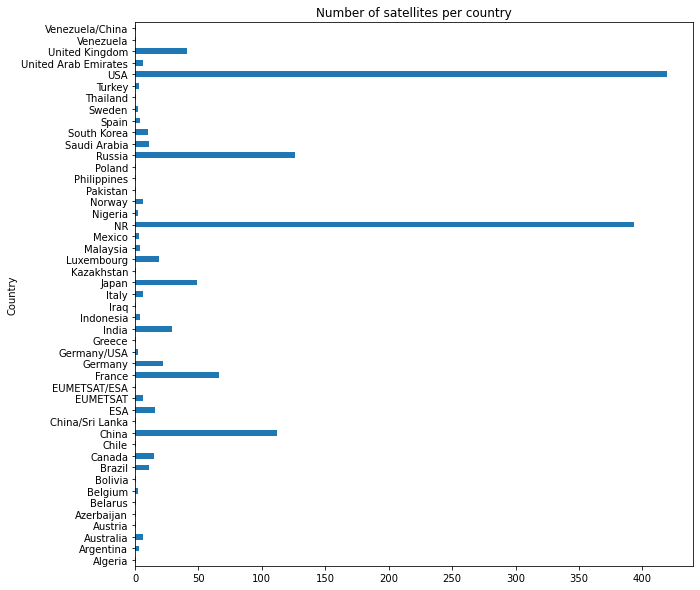

In [22]:
group_satname = df.groupby('Country/Organization of UN Registry') #group by the country owner
SatperCoun = group_satname.agg({'Official Name of Satellite':'nunique'}) #every country has its own counter of unique values
y = SatperCoun['Official Name of Satellite']
y = pd.DataFrame(y) #df with the number of sat and a index of every country

y.plot(kind='barh',
        title='Number of satellites per country',
        figsize=(10,10),
        legend=None,
        xlabel='Country')

posibles analisis?
numero de sats per Country of Operator/Owner
comparar Country/Organization of UN Registry || Country of Operator/Owner
lanzamientos por año
sat con mayor y menos potencia
lazamientos por año segun el proposito

<AxesSubplot:title={'center':'Number of sats'}, xlabel='year of launch', ylabel='Number lauched'>

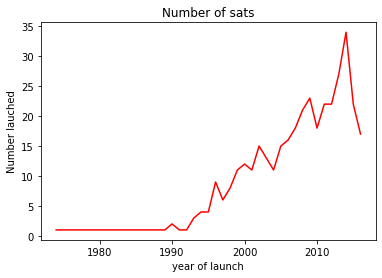

In [102]:
#we need to change the date type and work only with year
new_column = []
for i in df['Date of Launch']:
    time = pd.to_datetime(i).year
    new_column.append(time)
df['year of launch'] = new_column #now we have the year in a separate column

#group by year and then plot number of sats
group_byear = df.groupby('year of launch')
sat_year = group_byear.agg({'Country of Operator/Owner':'nunique'}) #every country has its own counter of unique values
sat_year['Country of Operator/Owner'].plot(kind='line',title='Number of sats',ylabel='Number lauched',color='r')
